In [2]:
import pandas as pd
import seaborn as sns
import ppscore as pps
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression

# Carregar e visualizar os dados

In [3]:
# Carrear os dados - Regressão
df = pd.read_csv('datasets/dataset_colesterol.csv')

In [4]:
df.head()

,Id,Grupo Sanguíneo,Fumante,Nível de Atividade,Idade,Peso,Altura,Colesterol
0,1,B,Sim,Baixo,33.0,85.1,186.0,199.63
1,2,A,Não,Moderado,68.0,105.0,184.0,236.98
2,3,O,Não,Alto,25.0,64.8,180.0,161.79
3,4,A,Não,Alto,43.0,120.2,167.0,336.24
4,5,AB,Não,Baixo,79.0,88.5,175.0,226.23


In [5]:
# Ajustar o df
df.drop('Id', axis=1, inplace=True)

# Aplicar One Hot Encoding nas variáveis categóricas
df = pd.get_dummies(df, columns=["Grupo Sanguíneo", "Fumante", "Nível de Atividade"])

In [6]:
# DF atualizado
df

,Idade,Peso,Altura,Colesterol,Grupo Sanguíneo_A,Grupo Sanguíneo_AB,Grupo Sanguíneo_B,Grupo Sanguíneo_O,Fumante_Não,Fumante_Sim,Nível de Atividade_Alto,Nível de Atividade_Baixo,Nível de Atividade_Moderado
0,33.0,85.1,186.0,199.63,0,0,1,0,0,1,0,1,0
1,68.0,105.0,184.0,236.98,1,0,0,0,1,0,0,0,1
2,25.0,64.8,180.0,161.79,0,0,0,1,1,0,1,0,0
3,43.0,120.2,167.0,336.24,1,0,0,0,1,0,1,0,0
4,79.0,88.5,175.0,226.23,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31.0,68.1,166.0,206.81,0,1,0,0,0,1,0,0,1
996,51.0,47.7,170.0,128.03,0,0,0,1,1,0,1,0,0
997,39.0,85.5,176.0,211.14,0,1,0,0,1,0,0,1,0
998,61.0,91.2,161.0,284.53,0,1,0,0,0,1,0,1,0


# Calcular PPS - Regressão

In [7]:
# Calcular PPS entre as variáveis
pps_matrix_reg = pps.matrix(df)
pps_matrix_reg

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Idade,Idade,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,Idade,Peso,0.000000,regression,True,mean absolute error,17.019416,18.019376,DecisionTreeRegressor()
2,Idade,Altura,0.000000,regression,True,mean absolute error,7.697183,7.849609,DecisionTreeRegressor()
3,Idade,Colesterol,0.000000,regression,True,mean absolute error,40.241254,41.996361,DecisionTreeRegressor()
4,Idade,Grupo Sanguíneo_A,0.000000,regression,True,mean absolute error,0.265797,0.381035,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
164,Nível de Atividade_Moderado,Fumante_Não,0.000000,regression,True,mean absolute error,0.369000,0.465173,DecisionTreeRegressor()
165,Nível de Atividade_Moderado,Fumante_Sim,0.000000,regression,True,mean absolute error,0.366000,0.463710,DecisionTreeRegressor()
166,Nível de Atividade_Moderado,Nível de Atividade_Alto,0.000000,regression,True,mean absolute error,0.272000,0.333439,DecisionTreeRegressor()
167,Nível de Atividade_Moderado,Nível de Atividade_Baixo,0.213158,regression,True,mean absolute error,0.426000,0.335195,DecisionTreeRegressor()


In [13]:
# Ajustar a matriz para fazer o plot
pps_matrix_reg_pivot = pps_matrix_reg[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
pps_matrix_reg_pivot

x,Altura,Colesterol,Fumante_Não,Fumante_Sim,Grupo Sanguíneo_A,Grupo Sanguíneo_AB,Grupo Sanguíneo_B,Grupo Sanguíneo_O,Idade,Nível de Atividade_Alto,Nível de Atividade_Baixo,Nível de Atividade_Moderado,Peso
y,,,,,,,,,,,,,
Altura,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
Colesterol,0.000000,1.000000,0.111074,0.108793,0.033112,0.024919,0.002713,0.065170,0.0,0.069186,0.051377,0.000000,0.487163
Fumante_Não,0.000000,0.021680,1.000000,0.983804,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
Fumante_Sim,0.000000,0.000000,0.983740,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
Grupo Sanguíneo_A,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
Grupo Sanguíneo_AB,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
Grupo Sanguíneo_B,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
Grupo Sanguíneo_O,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000
Idade,0.000000,0.000000,0.000000,0.000000,0.000346,0.001160,0.000000,0.000000,1.0,0.001327,0.000000,0.001337,0.000000


Text(0.5, 1.0, 'Matriz de PPS - Regressão')

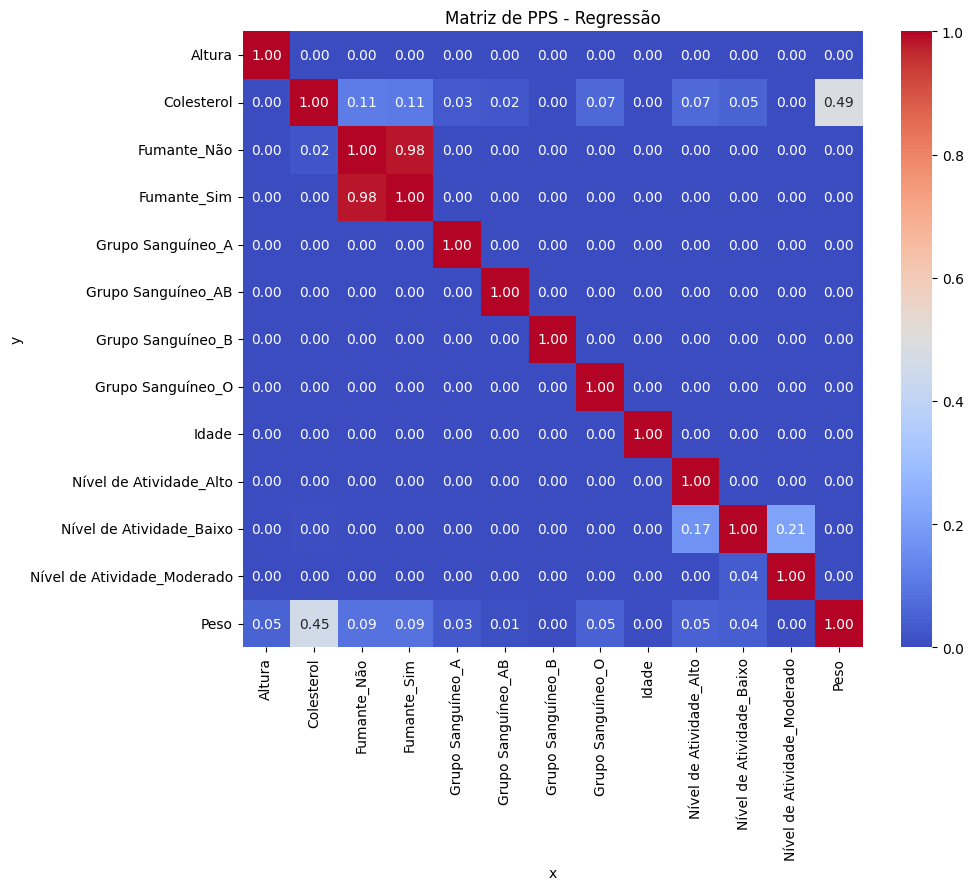

In [18]:
# Plotar a matriz de PPS
plt.figure(figsize=(10, 8))
sns.heatmap(pps_matrix_reg_pivot, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de PPS - Regressão')

In [19]:
# Calcular PPS entre duas variáveis específicas
pps.score(df, "Peso", "Colesterol")

{'x': 'Peso',
 'y': 'Colesterol',
 'ppscore': 0.4871628897710478,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 40.23360080240723,
 'model_score': 20.633283569611777,
 'model': DecisionTreeRegressor()}

# Matriz de correlação - Regressão

In [21]:
# Calcular a matriz de correlação
corr_matrix_reg = df.corr()
corr_matrix_reg

,Idade,Peso,Altura,Colesterol,Grupo Sanguíneo_A,Grupo Sanguíneo_AB,Grupo Sanguíneo_B,Grupo Sanguíneo_O,Fumante_Não,Fumante_Sim,Nível de Atividade_Alto,Nível de Atividade_Baixo,Nível de Atividade_Moderado
Idade,1.000000,-0.004846,0.007444,-0.016695,0.051374,-0.057725,0.020933,-0.008170,-0.007820,0.012553,0.065178,-0.002417,-0.052653
Peso,-0.004846,1.000000,0.379339,0.915961,0.213966,0.132691,-0.053030,-0.281412,-0.383466,0.378995,-0.278934,0.287633,-0.041198
Altura,0.007444,0.379339,1.000000,0.013554,-0.003791,-0.049590,0.024677,0.030700,0.001504,-0.003234,-0.016347,0.037128,-0.021345
Colesterol,-0.016695,0.915961,0.013554,1.000000,0.219684,0.181817,-0.072996,-0.317007,-0.425616,0.422522,-0.303478,0.302912,-0.035186
Grupo Sanguíneo_A,0.051374,0.213966,-0.003791,0.219684,1.000000,-0.364254,-0.241879,-0.415815,-0.069629,0.064101,-0.098421,0.058051,0.028362
Grupo Sanguíneo_AB,-0.057725,0.132691,-0.049590,0.181817,-0.364254,1.000000,-0.243118,-0.417945,-0.098763,0.102701,-0.065431,0.072286,-0.014138
Grupo Sanguíneo_B,0.020933,-0.053030,0.024677,-0.072996,-0.241879,-0.243118,1.000000,-0.277532,0.037686,-0.041249,0.046719,-0.048016,0.009973
Grupo Sanguíneo_O,-0.008170,-0.281412,0.030700,-0.317007,-0.415815,-0.417945,-0.277532,1.000000,0.129350,-0.125270,0.120834,-0.084753,-0.024565
Fumante_Não,-0.007820,-0.383466,0.001504,-0.425616,-0.069629,-0.098763,0.037686,0.129350,1.000000,-0.993568,0.122800,-0.145870,0.040607
Fumante_Sim,0.012553,0.378995,-0.003234,0.422522,0.064101,0.102701,-0.041249,-0.125270,-0.993568,1.000000,-0.123869,0.147287,-0.036619


Text(0.5, 1.0, 'Matriz de Correlação - Regressão')

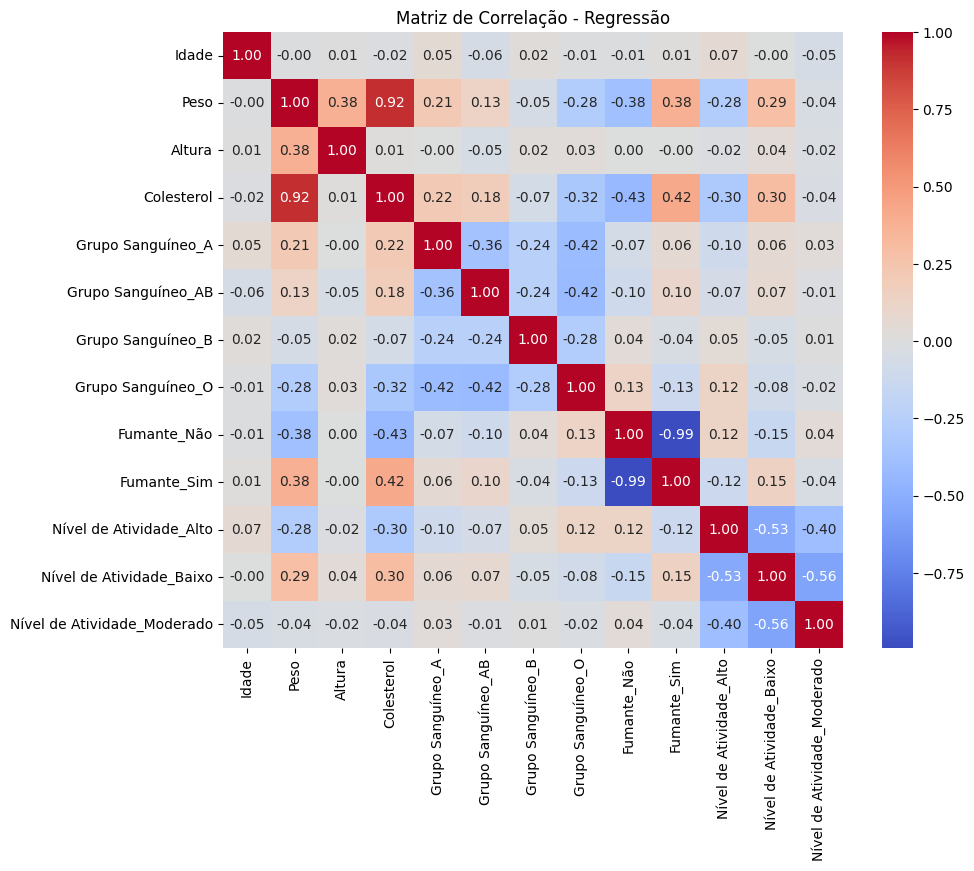

In [22]:
# Plotar matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_reg, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlação - Regressão')